
# **부스팅(Boosting)**
* **작성자:** (이형돈)

---
## **논문: A Decision-Theoretic Generalization of On-Lin Learning and an Application to Boosting(1996)**

부스팅은 여러개의 약한 모델들을 동적으로 조합하여, 사후적으로 가장 성능이 좋았던 단일 모델만큼의 성능을 내는 것을 목표로한다. 이러한 과정의 핵심 주요 변수는 다음과 같다.

* 할당 주체 A: 우리가 만들 최종 모델
* N개의 전략: N개의 약한 모델
* 시간 단계t: 데이터를 하나하나 예측하는 각 단계
* 분포 $p^t$: t번 째 단계에서 각 모델들에 대한 가중치 벡터
* 손실 $l_i^t$: t번째 단계에서 i번째 약한 모델이 얼마나 틀렸는지를 나타내는
* A의 손실= $p^t \cdot l^t$: 할당 주체 A의 손실은 N개 전략 각각의 손실 가중치를 곱해 모두 더한 손실의 가 평균이다. 이를 혼합 손실이라고 한다.

A의 목표는 최상의 전략이 입은 손실 대비 자신의 누적 손실을 최소화 하는 것이다, 즉 자신의 순손실인 $L_A-min_iL_i$를 최소화하려고 시도하는 것이다. 최상의 전략과 자신의 누적 손실의 차이를 후회(Regret)이라고 한다.
* $L_A=\sum_{t=1}^{T}p^t \cdot l^t$: 최종 모델의 총 누적 손실이다.
* $L_i=\sum_{t=1}^{T}l_i^t$: 약한모델 i의 누적 손실이다.






이러한 후회를 최소화하기 위해 Hedge($\beta$) 알고리즘을 사용한다. 알고리즘의 작동 방식은 다음과 같다.


1.   맨 처음 각 약한 모델에게 기대 점수(초기 가중치 벡터 $w^1$)를 부여한다.
2.   t번째 단계에서 현재의 신뢰점수를 정규화(합=1)로 하여 이번 라운드의 할당 비율을 정한다.
3.   결과를 확인하고, 가중치를 업데이트 한다.

이 방식은 예측을 잘한 모델의 가중치는 유지하고, 예측을 못한 모델의 가중치는 깍아버리는 간단한 방식이다. 곱셈 가중치 업데이트라고 하기도 한다.



위의 방식을 증명하는 방법은 모든 라운드가 끝난 뒤 남은 가중치들의 총합의 상한선과 하한선을 구한 바닥≤천장이라는 부등식을 세우는 것이다.

먼저 상한선(천장)을 구하는 Lemma1의 수식은 다음과 같다.$$\ln\left(\sum_{i=1}^{N} w_i^{T+1}\right) \le -(1-\beta)L_{\text{Hedge}(\beta)}$$
좌변은 모든 라운드가 끝난 후 살아남은 모든 약한 모델들의 최종 신뢰 점수에 로그 값을 씌운 것이다. 우변은 최종 모델의 총 누적 손에 관련된 값이다.
따라서 최종 모델의 손실이 클수록 T라운드 후에 남아있는 전체 가중치의 총합은 지수적으로 작아짐을 의미한다.

다음으로 하한선(바닥)을 구하는 수식은 다음과 같다. $$\sum_{i=1}^{N} w_i^{T+1} \ge w_k^1 \beta^{L_k}, \quad \text{where } L_k = \min_{j} L_j$$  이는 모든 전략의 가중치의 합은 그중 가장 손실이 작았던 모델 하나 최종 가중보다 크거나 같다는 것을 의미한다.


$\beta$는 알고리즘이 얼마나 엄격하게 약한 모델들을 다룰지 결정하는 파라미터이다. 최적의 $\beta$를 구하기 위하여 Lemma4를 활용한다. 이는 가장 성능이 좋은 모델의 최대 누적 손실을 미리 어림짐작할 수 있다면, 거기에 맞춰 최적의 $\beta$값을 계산해주고 최종 성능 상한선을 알려준다.

Hedge알고리즘의 가중치 조정 아이디어를 부스팅에 적용할 수 있다. Hedge방법은 성과가 나쁜 약한모델의 가중치를 깍는반면, 부스팅은 예측하기 어려운 데이의 가중치를 올려서 모델 자체의 성능을 향상시키는 방법이다. 부스팅 알고리즘의 하나인 에이다 부스트의 작동 방식은 다음과 같다.



1.   맨처음 모든 데이터에 공평하게 1/N이라는 똑같은 중요도를 부여한다.
2.   현재 데이터들의 중요도를 약한 학습기에게 알려주고, 가중치가 높은 데이터에 집중해서 하나의 모델을 학습시킨다.
3.   학습된 모델의 가중 오차를 구한다. 오차가 낮은 모델일 수록 최종 투표에서의 영향력이 크다.
4.   학습된 모델이 틀린 데이터의 가중치는 그대로 두고, 정답을 맞춘 데이터의 가중치는 낮춘다.
5.   2,3,4과정을 반복한 후 최종 결정을 내리는 가중 투표를 실시한다.





에이다 부스트의 성능이 얼마나 좋은지 수학적으로 분석할 수 있다.
Theorem6은 에이다 부스트의 최종 모델 에러가 T번의 라운드를 거치면서 얼마나 빠르게 0에 가까워지는지에 대한 상한선을 보여준다.$$\epsilon \le \exp\left(-2\sum_{t=1}^{T}\gamma_t^2\right)$$

엡실론은 최종 모델의 최종 오류율이다 0에 가까울 수록 성능이 좋음을 나타낸다.
감마는 t번째 라운드의 약한 모델이 무작위 추측보다 얼마나 더 나은지를 나타내는 값이다. 이 수식의 의미는 약한 모델의 추측이 무작위 추측보다 조금이라도 더 잘한다면, 그것이 반복되었을때 지수적으로 쌓여서 오류가 빠르게 감소한다는 것이다.

다음으로는 에이다 부스트의 과적합 문제와 이를 어떻게 해결하는지에 대해 설명한다. 에이다 부스트를 오래 반복하게되면 주어진 학습데이터를 거의 다 학습해버려서 훈련데이터의 오류는 굉장히 낮아지지만, 처음 접하는 데이터에 대한 응용력은 낮아지게 된다. 이를 해결하기 위한 첫 번째 방법은 VC-차원이라는 도구를 사용하여 최적의 t값을 찾는 것이고, 두 번째 방법은 데이터를 훈련용과 검증용 두가지로 나누는 교차검증 방법이다. 훈련용 데이터로 학습한 뒤 검증용 데이터로 각t마다 검증하여 가장 오류가 낮은 t를 선택하는 방법이다. 다만 저자들은 에이다 부스트를 실제로 실험해보았을 때, 과적합이 자주일어나지는 않는다고 주장한다.

기존의 에이다 부스트는 이진 분류 문제에 대해서 다루었다. 조금 더 다중 클래스 문제를 해결하기 위해서는 에이다 부스트.M1이라는 확장버전을 사용할 수 있다. 하지만 에이다 부스트.M1은 각각의 약한 모델의 오류율이 50%미만이라는 전제조건이 존재한다. 이러한 전제조건은 다중 클래스에서 50%이상의 오류율을 가진 중요한 변수를 탈락시키기 때문에, 이를 보완하기 위해 에이다 부스트.M2를 제안한다. 이는 새로운 두가지 규칙을 부여하는데, 첫 번째는 각 선택지에 대한 믿음의 정도를 벡터형태로 알려주는 것이고, 두 번째는 어떤 오답을 더 심각하게 볼 것인지에 대한 가중치를 매번 다르게 줌으로써 특정 데이터 내에서의 정답 후보들 사이의 관계까지 집중하도록 만들 수 있다.

지금까지의 분류문제를 넘어 예측을 하는 회귀문제에는 에이다 부스트.R을 활용할 수 있다. 이는 회귀 문제를 무수히 많은 이진 분류 문제로 바꿔버리는 아이디어를 사용한다. 어떤 기준을 제시했을 실제 값이 그것보다 높은지 낮은지를 맞추는 것이다. 까다로운 기준액 근처의 질문들에 가중치를 높게 부여하여 분석을 반복하였을 때 T개의 약한 모델들이 예측한 결과들을 단순히 평균 내는 것이 아니라 가중 중앙값 방식(성능이 좋았던 약한 모델의 예측값에 더 큰 비중을 두어 중앙값을 찾는 방식)으로 조합하여 최종적인 연봉 예측치를 제시한다.

---
## **논문:  GREEDY FUNCTION APPROXIMATION:A GRADIENT BOOSTING MACHINE(1999)**

이전 에이다 부스트의 최종 목표는 최적의 함수 F(x)를 찾는 것이다. 프리드먼은 이 문제를 함수를 구성하는 최적의 파라미터 묶음 P를 찾는 수치 최적화 문제로 재해석한다. 여기서 P는 모든 약한 학습기의 종류와 가중치의 집합을 말한다. 이러한 파라미터들을 한 번에 찾는 것은 힘들기 때문에, 점진적으로 최적해를 찾아가는 방식을 사용한다.

최적해를 찾아가는 방식에는 경사하강법이 있다. 최종 추정치는 초기 추정치와 연속적인 증분들의 합으로 표현된다. 이를 구하는 방법은 다음과 같다.

1.   그래디언트(기울기) 계산: 현재 단계의 파라미터 값에서 손실 함수의
그래디언트 값을 구한다.
2.   최적 방향 결정: 손실 함수 값을 가장 빠르게 감소시키는 음의 그래디언트 값을 결정한다.
3.   스텝 사이즈 결정: 음의 그래디언트 방향으로 얼마나 이동할지 라인 서치라는 방법을 통해 결정한다.
4.   증분 계산: 최종적인 m 번째 증분은 최적 방향과 스텝사이즈의 곱으로 결정된다.

프리드먼은 이러한 경사하강법을 함수 공간으로 확장한다. 하지만 이러한 방법의 가장 큰 문제는 그래디언트 함수를 우리가 가진 N개의 지점에서밖에 계산할 수 없어 새로운 데이터에 대해서는 방향을 구할 수 없다는 것이다. 따라서 이러한 문제를 해결하기 위해 그래디언트 부스트를 제안한다. 그래디언트 부스트의 방법은 다음과 같다.


1.   현재까지 만들어진 모델의 예측값과 실제 정답과의 차이를 계산한다.(의사-잔차 계산)
2.   의사-잔차를 하나의 정답으로 취급하고, 이를 예측하는 약한 학습기를 학습시킨다.
3.   2단계의 약한 학습기가 학습한 내용을 어느정도 반영해야 전체 손실이 가장 많이 줄어들지 계산한다. 이것이 라인 서치이다.

이러한 그래디언트 부스트를 적용하기 위해서 여러가지 구체적인 첫 번째 알고리즘은 최소 제곱법 회귀이다. 이 알고리즘은 손실 함수로 제곱 오차를 사용한다. 이 손실 함수를 미분하여 의사-잔차를 구하는데 이 결과가 전통적 회귀 분석의 잔차와 같은 값이 나온다. 그래디언트 부스트는 매 라운드마다 현재 모델의 잔차를 학습하는 과정을 반복하는 것과 같다.

최소 절대 편차 회귀(LAD)는 손실 함수를 제곱 오차에서 절대 오차로 바꿔 사용하는 방식이다. $$L(y, F) = |y - F|$$이는 제곱 오차보다 예측이 크게 벗어난 값에 덜 민감하다는 장점이있다. 이 값의 변화율은 +1,-1  두 값으로만 나타나며, 약한 학습기는 이 부호를 예측하도록 학습된다. 그리고 모델을 업데이트할 때의 최적 강도는 가중 중앙값을 통해 구한다.

---
## **논문:  Seeing beyond the Trees: Using Machine Learning to Estimate the Impact of Minimum Wages on Labor Market Outcomes(2022)**

최저임금 연구에는 정말로 영향을 받는 사람들을 골라내기 힘들다는 딜레마가 존재한다. 그래서 10대 고용률을 분석하고 최저임금 정책이 성인 근로자에게 미치는 영향을 주장하는 모순적인 상황이 자주 발생하였다. 이 연구는 딜레마를 해결하기 위해 머신러닝을 사용해서 최저임금 인상의 영향을 받을 확률이 높은 사람들을 예측하고 인과관계를 추론한다.

최저임금 정책의 성공 여부를 판단하기 위해서는 고용률만 봐서는 판단하기 힘들다. 최저임금으로 경제활동참가율이 높아지고 그 결과 노동 공급이 많아져서 실업률이 오를 수도 있다.

누가 최저임금 근로자인지 예측하기 위해서는 대상을 명확히 설정해야한다. 예측 대상은 한 근로자의 임금이 법정 최저임금의 125%보다 낮을 확률이다. 또한 인구 통계학적 특성을 입력값으로 사용하여 현재 직업이 없는 사람이 최저임금 영향을 받을지 예측할 수 있다. 연구 과정은 훈련용 데이터로 여러 종류의 머신러닝 모델을 학습시키고, 시험용 데이터로 어떤 모델이 가장 예측을 잘하는지 비교한다.
연구에 사용되는 머신러닝 모델은 의사결정나무, 랜덤 포레스트, 그래디언트 부스트, 탄력적 그물망(라쏘+릿지), 선형 확률 모형이 있다.

모델의 성능 판단하기 위해 정밀도와 재현율이라는 반비례 관계의 두 가지 지표를 사용한다.


*   정밀도: 모델이 a라고 예측한 사람들 중 진짜 a는 몇명인가?
*   재현율: 전체 a중, 모델이 몇 명이나 찾아냈는가?




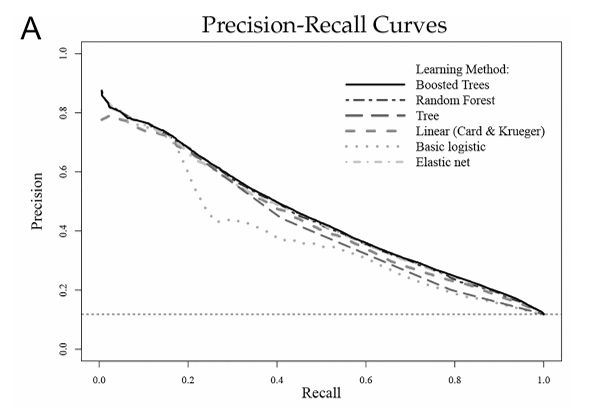

그래프의 x축은 재현율, y축은 정밀도로 구성되어있다. 같은 재현율일때 정밀도가 높은 모델이 성능이 좋은 모델이다. 그래프를 보면, 검은색 실선으로 된 Boosted Trees(그래디언트 부스트)가 거의 모든 구간에서 성능이 좋음을 알 수 있다.

예측 확률이 가장 높은 사람부터 가장 낮은 사람까지 10%씩 10개 그룹으로 줄을 세우고, 각 그룹의 사람들의 특성을 확인한다. 확인 결과 나이가 매우 중요한 변수임이 드러났다. 가장 높은 최상위 10% 그룹의 72%가 10대였다. 그리고 그 아래 그룹부터는 10대의 비율이 5%미만으로 급격히 줄고 20대 성인이 대다수를 차지하였다. 학력또한 중요한 변수로, 학력이 낮을수록 상위 그룹에 많이 분포하였다.

다음으로는 그래디언트 부스트 자체를 분석하여 모델이 예측을 할 때 어떤 변수를 가장 중요하게 고려했는지 순위를 매겼는데, 나이가 가장 중요한 변수임을 확인할 수 있다.

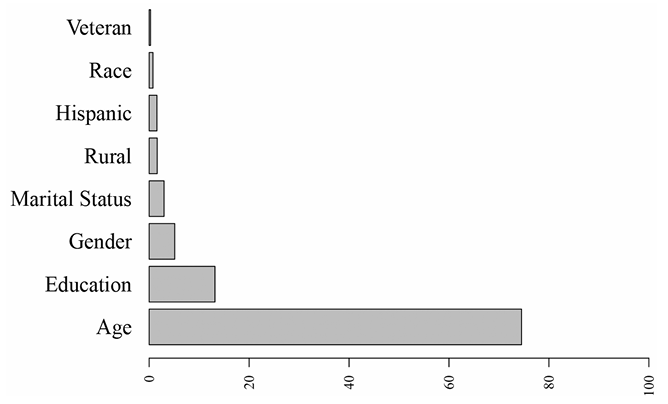

이렇게 그래디언트 부스트으로 정의한 최저임금 영향을 받을 확률이 높은 그룹을 대상으로, 저자들은 이벤트 스터디라는 분석 방법을 사용해 최저임금 인상 전후로 어떤 변화가 있었는지 확인한다. 최저임금 영향을 받을 확률이 높은 그룹과 재현율이 높은 넓은 그룹 모두에서 최저임금 인상 후 통계적으로 유의미한 임금 상승이 나타났. 그리고 임금이 올랐음에도 두 그룹 모두 고용이 감소했다는 통계적 증거를 찾을 수 없었다. 또한 실업과 경제활동참가율에도 큰 영향을 미치지 못하는 것으로 확인되었다.

---
참고문헌
* Freund, Y., & Schapire, R. E. (1997). A decision-theoretic generalization of on-line learning and an application to boosting. Journal of computer and system sciences, 55(1), 119-139.
* Friedman, J. H. (2001). Greedy function approximation: a gradient boosting machine. Annals of statistics, 1189-1232.
* Cengiz, D., Dube, A., Lindner, A., & Zentler-Munro, D. (2022). Seeing beyond the trees: Using machine learning to estimate the impact of minimum wages on labor market outcomes. Journal of Labor Economics, 40(S1), S203-S247.